In [1]:
pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [13]:
# print(mnist.load_data())
print(x_train.shape)

(60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt

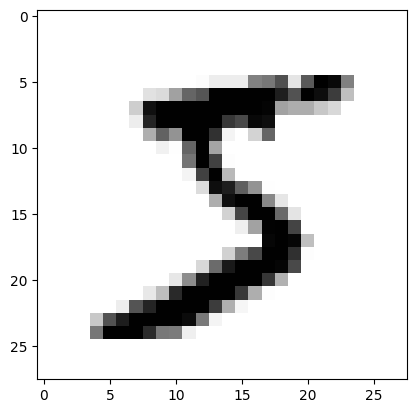

In [7]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

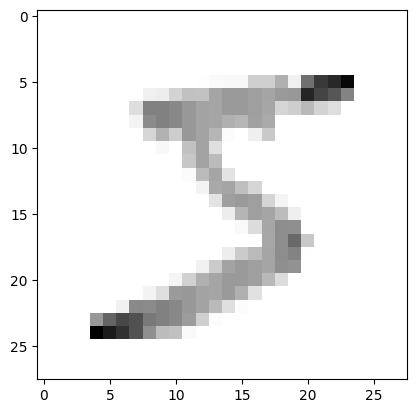

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)//normalization,every value of x_train is divided by 255 because if the color changes we need not worry about it
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
import numpy as np
isize=28
x_trainr=np.array(x_train).reshape(-1,isize,isize,1)
x_testr=np.array(x_test).reshape(-1,isize,isize,1)#increasing 1d for kernal operation
print(x_trainr.shape)

(60000, 28, 28, 1)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout,MaxPooling2D,Conv2D,Flatten

In [20]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))#filter size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))#filter size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))#filter size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("Softmax"))#or sigmoid ,last layer 

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [24]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 55s 40ms/step - loss: 0.3180 - accuracy: 0.8998 - val_loss: 0.1329 - val_accuracy: 0.9584
Epoch 2/5
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0982 - accuracy: 0.9704 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 3/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0862 - val_accuracy: 0.9741
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0905 - val_accuracy: 0.9727
Epoch 5/5
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.0690 - val_accuracy: 0.9797


In [25]:
test_loss,test_accuracy=model.evaluate(x_testr,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0647 - accuracy: 0.9808


In [26]:
print(test_loss)#id accuracy if lot more than recieved while training it is called overfitting 
print(test_accuracy)#here training acc=0.9797 and test accu=0.98

0.06468766182661057
0.9807999730110168


In [27]:
predictt=model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [28]:
print(predictt)

[[1.59297144e-06 2.03351078e-06 1.06999951e-05 ... 9.99881148e-01
  2.08436222e-06 5.17469525e-05]
 [3.62358987e-05 1.43691495e-05 9.99793828e-01 ... 5.43624046e-05
  2.40065146e-05 3.62324249e-06]
 [6.23812397e-08 9.99983549e-01 1.53509347e-08 ... 2.02236574e-08
  9.84852306e-08 3.43302653e-09]
 ...
 [1.08125509e-09 3.17938174e-08 1.54416373e-08 ... 1.92911898e-06
  8.09005599e-07 1.89804098e-06]
 [8.98086946e-05 1.92235078e-07 5.22053467e-09 ... 1.61931894e-07
  1.69895729e-03 2.38608136e-05]
 [2.74238374e-07 2.62988131e-10 1.82917292e-09 ... 5.46656505e-11
  7.76528964e-07 3.47673934e-09]]


In [30]:
print(np.argmax(predictt[0]))

7


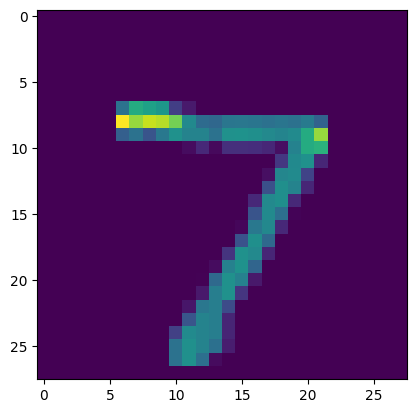

In [32]:
plt.imshow(x_test[0])

In [33]:
import cv2

In [58]:
i= cv2.imread('untitled.png')

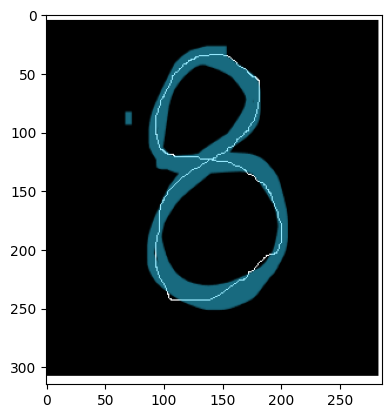

In [59]:
plt.imshow(i)

In [60]:
gray=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)


In [61]:
resize=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [62]:
new=tf.keras.utils.normalize(resize,axis=1)


In [63]:
new=np.array(new).reshape(-1,isize,isize,1)
new.shape

(1, 28, 28, 1)

In [64]:
predic=model.predict(new)

1/1 [==============================] - 0s 40ms/step


In [65]:
print(np.argmax(predic))

8
